___
# Ciência dos Dados - PROJETO 1

# Renan Cabral
___

___
## Introdução

Ao longo desta projeto de análise do banco de dados da PNAD serão análisados os dados de acessibilidade à internet e acesso a banda larga no Brasil, em todas as suas regiões, observando regiões como São Paulo e Maranhão a fim de analisar fatores que possam afetar e presença deste (acessibilidade e banda larga), além de observar o avanço da acessibilidade no Brasil ao longo dos anos pesquisados.

## Pergunta:

Qual o principal fator ou fatores que afeta a acessibilidade à banda larga no Brasil ? Levando em consideração fatores como região, PIB do estado, renda média dentre outros.

In [97]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [98]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Renan Cabral\Documents\GitHub\Ci-ncia_dos_dados_2017


In [99]:
dados=pd.read_csv('DOM2015csv.zip',sep=',')
dados_geral=pd.read_csv('DOM2015csv.zip',sep=',')

In [100]:
dados.UF

dados=dados[(dados.UF==35) | (dados.UF==21)]
dados.shape


(20517, 81)

In [126]:
#dados Brasil inteiro:

dados_geral.V02322=dados_geral.V02322.astype("category") #acesso no próprio domicílio
dados_geral.V02322.cat.categories=(['Sim', 'Não'])

dados_geral.V02323=dados_geral.V02323.astype("category") #acesso por microcomputador
dados_geral.V02323.cat.categories=(['Sim', 'Não'])

dados_geral.V02324=dados_geral.V02324.astype("category") #acesso por telefone
dados_geral.V02324.cat.categories=(['Sim', 'Não'])

dados_geral.V02325=dados_geral.V02325.astype("category") #acesso por tablet
dados_geral.V02325.cat.categories=(['Sim', 'Não'])

dados_geral.V02326=dados_geral.V02326.astype("category") #acesso pela TV
dados_geral.V02326.cat.categories=(['Sim', 'Não'])

dados_geral.V02327=dados_geral.V02327.astype("category") #acesso por outras formas
dados_geral.V02327.cat.categories=(['Sim', 'Não'])

dados_geral.V02424=dados_geral.V02424.astype("category") #acesso através de rede celular 
dados_geral.V02424.cat.categories=(['Sim', 'Não'])

dados_geral.V02425=dados_geral.V02425.astype("category") #acesso por linha telefônica
dados_geral.V02425.cat.categories=(['Sim', 'Não'])

dados_geral.V02426=dados_geral.V02426.astype("category") #acesso de banda larga 
dados_geral.V02426.cat.categories=(['Sim', 'Não'])

dados_geral.V0202=dados_geral.V0202.astype("category") #tipo de domicílio
dados_geral.V0202.cat.categories=(["Casa","Apartamento","Cômodo"])

#dados_geral.V4622 #faixa da renda mensal
#dados_geral.V4621 #renda mensal

dados_geral.UF=dados_geral.UF.astype("category") #estados do Brasil
dados_geral.UF.cat.categories=(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná', 'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'])


In [127]:
dados_filt=pd.DataFrame()

dados_t=dados_geral[(dados_geral.V0202.notnull()) & (dados_geral.V4622.notnull()) & (dados_geral.V4621.notnull()) & (dados_geral.V02426.notnull()) & (dados_geral.V4105.notnull()) & (dados_geral.V02425.notnull()) & (dados_geral.V02424.notnull()) & (dados_geral.V02327.notnull()) & (dados_geral.V02326.notnull()) & (dados_geral.V02325.notnull()) & (dados_geral.V02324.notnull())  & (dados_geral.V02323.notnull())  & (dados_geral.V02322.notnull())]

#Criando colunas:
dados_filt["acesso_a_banda_larga"]=dados_t.V02426
dados_filt["acesso por telefone"]=dados_t.V02324
dados_filt["estado"]=dados_geral.UF
dados_filt["renda_mensal"]=dados_t.V4621
dados_filt.renda_mensal=dados_filt.renda_mensal[dados_filt.renda_mensal!=999999999999]
dados_filt["faixa_da_renda_mensal"]=dados_t.V4622
dados_filt["Tipo_de_domicílio"]=dados_t.V0202

(dados_filt.renda_mensal).round(decimals=1)

dados_filt.loc[(dados_geral.V02426=='Sim') | (dados_geral.V02425=='Sim') | (dados_geral.V02424=='Sim') | (dados_geral.V02327=='Sim') | (dados_geral.V02326=='Sim') | (dados_geral.V02325=='Sim') | (dados_geral.V02324=='Sim') | (dados_geral.V02323=='Sim') | (dados_geral.V02322=='Sim'), 'acesso_a_internet']='possuí'
dados_filt.loc[(dados_geral.V02426=='Não') & (dados_geral.V02425=='Não') &  (dados_geral.V02424=='Não') &  (dados_geral.V02327=='Não') &  (dados_geral.V02326=='Não') &  (dados_geral.V02325=='Não') &  (dados_geral.V02324=='Não') &  (dados_geral.V02323=='Não') &  (dados_geral.V02322=='Não'), 'acesso_a_internet']='não possuí'

dados_filt.loc[(dados_geral.UF=="São Paulo") | (dados_geral.UF=="Rio de Janeiro") | (dados_geral.UF=="Espírito Santo") | (dados_geral.UF=="Minas Gerais") ,"Região"]="Sudeste"
dados_filt.loc[(dados_geral.UF=="Amazonas") | (dados_geral.UF=="Pará") | (dados_geral.UF=="Amapá") | (dados_geral.UF=="Tocantis") | (dados_geral.UF=="Rondônia") | (dados_geral.UF=="Roraima") |  (dados_geral.UF=="Acre"),"Região"]="Norte"
dados_filt.loc[(dados_geral.UF=="Bahia") | (dados_geral.UF=="Piauí") | (dados_geral.UF=="Maranhão") | (dados_geral.UF=="Ceará") | (dados_geral.UF=="Paraíba") | (dados_geral.UF=="Pernambuco") | (dados_geral.UF=="Alagoas") | (dados_geral.UF=="Sergipe") | (dados_geral.UF=="Rio Grande do Norte"),"Região"]="Nordeste"
dados_filt.loc[(dados_geral.UF=="Mato Grosso") | (dados_geral.UF=="Goiás") | (dados_geral.UF=="Mato Grosso do Sul") | (dados_geral.UF=="Distrito Federal") ,"Região"]="Centro-Oeste"
dados_filt.loc[(dados_geral.UF=="Rio Grande do Sul") | (dados_geral.UF=="Santa Catarina") | (dados_geral.UF=="Paraná") ,"Região"]="Sul"


#plots:


dados_filt


,acesso_a_banda_larga,acesso por telefone,estado,renda_mensal,faixa_da_renda_mensal,Tipo_de_domicílio,acesso_a_internet,Região
2,Sim,Não,Rondônia,1150.0,4.0,Apartamento,possuí,Norte
3,Sim,Sim,Rondônia,793.0,4.0,Casa,possuí,Norte
5,Sim,Não,Rondônia,1990.0,5.0,Casa,possuí,Norte
8,Sim,Sim,Rondônia,818.0,4.0,Casa,possuí,Norte
10,Sim,Sim,Rondônia,1716.0,5.0,Casa,possuí,Norte
11,Sim,Sim,Rondônia,2500.0,6.0,Casa,possuí,Norte
13,Sim,Sim,Rondônia,1400.0,4.0,Apartamento,possuí,Norte
15,Sim,Sim,Rondônia,666.0,3.0,Apartamento,possuí,Norte
17,Sim,Sim,Rondônia,750.0,3.0,Casa,possuí,Norte
18,Sim,Sim,Rondônia,1437.0,4.0,Casa,possuí,Norte


In [103]:
#cruzar acesso a banda larga com região

acesso_região=pd.crosstab(dados_filt.Região, dados_filt.acesso_a_banda_larga, margins=True, rownames=['Região'], colnames=['Acesso:'])

print("acesso absoluto a banda larga por região")

acesso_região

acesso absoluto a banda larga por região


Acesso:,Sim,Não,All
Região,,,
Centro-Oeste,5625,2124,7749
Nordeste,10771,5273,16044
Norte,3238,3994,7232
Sudeste,17625,6085,23710
Sul,9499,2831,12330
All,46758,20307,67065


In [104]:
acesso_Sudeste_relt=pd.crosstab(dados_filt.Região[dados_filt.Região=="Sudeste"], dados_filt.acesso_a_banda_larga[dados_filt.Região=="Sudeste"], margins=True, rownames=['Região'], colnames=['Banda larga'], normalize=True)*100
acesso_Sudeste_relt=acesso_Sudeste_relt.round(decimals=2)

print("Frequência relativa de acesso a banda larga no Sudeste:")

acesso_Sudeste_relt

Frequência relativa de acesso a banda larga no Sudeste:


Banda larga,Sim,Não,All
Região,,,
Sudeste,74.34,25.66,100.0
All,74.34,25.66,100.0


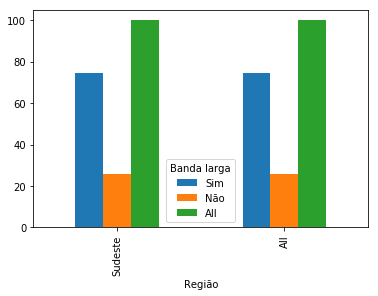

In [105]:
g_sud=acesso_Sudeste_relt.plot(kind="bar")
plt.ylabel=("Freq. Relat. (em %)")
plt.show()

Frequência relativa de acesso a banda larga no Sudeste:


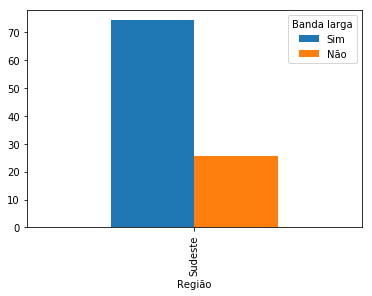

In [106]:
acesso_Sudeste_relt=pd.crosstab(dados_filt.Região[dados_filt.Região=="Sudeste"], dados_filt.acesso_a_banda_larga[dados_filt.Região=="Sudeste"], rownames=['Região'], colnames=['Banda larga'], normalize="index")*100
acesso_Sudeste_relt=acesso_Sudeste_relt.round(decimals=2)

print("Frequência relativa de acesso a banda larga no Sudeste:")

g_sud=acesso_Sudeste_relt.plot(kind="bar")
plt.ylabel=("Freq. Relat. (em %)")
plt.show()

In [107]:
acesso_região_relat=pd.crosstab(dados_filt.Região, dados_filt.acesso_a_banda_larga, margins=True, rownames=['Região'], colnames=['Banda larga'], normalize="index")*100
acesso_região_relat=acesso_região_relat.round(decimals=2)

print("acesso a banda larga relativo por região")

acesso_região_relat

acesso a banda larga relativo por região


Banda larga,Sim,Não
Região,,
Centro-Oeste,72.59,27.41
Nordeste,67.13,32.87
Norte,44.77,55.23
Sudeste,74.34,25.66
Sul,77.04,22.96
All,69.72,30.28


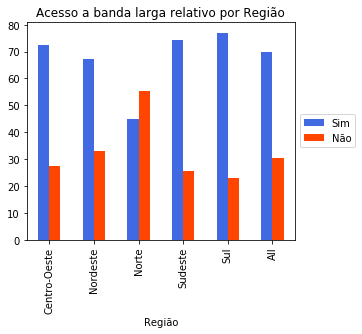

In [108]:

graph=acesso_região_relat.plot(kind='bar', title="Acesso a banda larga relativo por Região", color=["royalblue", "orangered"])

#legenda para fora:
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


In [131]:
#tipo de domicílio por Região:
dom_reg_relat=pd.crosstab(dados_filt.Região, dados_filt.Tipo_de_domicílio,  margins=True, rownames=['Região'], colnames=['Tipo de domicílio'], normalize="index")*100
dom_reg_relat=dom_reg_relat.round(decimals=2)
dom_reg_relat

Tipo de domicílio,Casa,Apartamento,Cômodo
Região,,,
Centro-Oeste,85.21,14.36,0.43
Nordeste,86.13,13.77,0.11
Norte,90.50,8.68,0.82
Sudeste,78.59,21.30,0.11
Sul,79.59,20.34,0.06
All,82.63,17.16,0.21


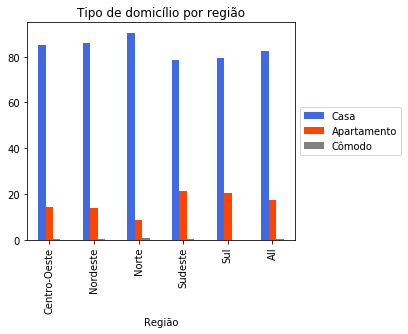

In [135]:

graph=dom_reg_relat.plot(kind='bar', title="Tipo de domicílio por região", color=["royalblue", "orangered", "grey"])

#legenda para fora:
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


## Obs:

    Após primeira observação sobre os gráficos de tipo de domicílio por região e acesso a banda larga por região parece haver uma correlação entre acesso à banda larga e tipo de domicílio por região, assim pode-se dizer que provavelmente o tipo de domicílio é um dos fatores que afetam a presença de banda larga.
    Vale comentar que apesar de haver uma proporção aparente, em que quanto maior a proporção de casas, menor é a presença de banda larga, vistos nos exemplos da região norte que possue a maior quantidade de casas e a menor presença de banda larga e região sudeste que possue a menor quantidade de casas e maior presença de banda larga.
(a mesma proporção se repete para a região nordeste e outras)
Apesar de haver tal proporção fica claro que não é direta e que está deve estar relacionado a questões de infraestrutura dos estados e regiões.

In [139]:
dados_filt.renda_mensal.describe()

count     66332.000000
mean       1590.508774
std        2404.472403
min           0.000000
25%         525.000000
50%         925.000000
75%        1697.000000
max      150000.000000
Name: renda_mensal, dtype: float64

In [124]:
faixa = np.arange(0.5,25,3.5)

renda=pd.cut(dados_filt.renda_mensal[dados_filt.Região=="Sudeste"], bins=faixa, right=False)

ut1 = (renda.value_counts(sort=False, normalize=True)*100).round(decimals=1)

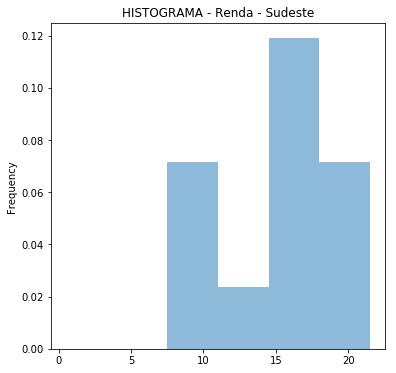

In [125]:

plot = dados_filt.renda_mensal[dados_filt.Região=="Sudeste"].plot.hist(bins=faixa,title='HISTOGRAMA - Renda - Sudeste',figsize=(6, 6), normed=1, alpha=0.5)

plt.show()

In [112]:
# Separação entre pesquisa geral no país

In [113]:
dados.V02322=dados.V02322.astype("category") #acesso no próprio domicílio
dados.V02322.cat.categories=(['Sim', 'Não'])

dados.V02323=dados.V02323.astype("category") #acesso por microcomputador
dados.V02323.cat.categories=(['Sim', 'Não'])

dados.V02324=dados.V02324.astype("category") #acesso por telefone
dados.V02324.cat.categories=(['Sim', 'Não'])

dados.V02325=dados.V02325.astype("category") #acesso por tablet
dados.V02325.cat.categories=(['Sim', 'Não'])

dados.V02326=dados.V02326.astype("category") #acesso pela TV
dados.V02326.cat.categories=(['Sim', 'Não'])

dados.V02327=dados.V02327.astype("category") #acesso por outras formas
dados.V02327.cat.categories=(['Sim', 'Não'])

dados.V02424=dados.V02424.astype("category") #acesso através de rede celular 
dados.V02424.cat.categories=(['Sim', 'Não'])

dados.V02425=dados.V02425.astype("category") #acesso por linha telefônica
dados.V02425.cat.categories=(['Sim', 'Não'])

dados.V02426=dados.V02426.astype("category") #acesso de banda larga 
dados.V02426.cat.categories=(['Sim', 'Não'])



In [114]:
dados_filtrado=pd.DataFrame()

dados_temp=dados[(dados.V02426.notnull()) & (dados.V4105.notnull()) & (dados.V02425.notnull()) & (dados.V02424.notnull()) & (dados.V02327.notnull()) & (dados.V02326.notnull()) & (dados.V02325.notnull()) & (dados.V02324.notnull())  & (dados.V02323.notnull())  & (dados.V02322.notnull())]

dados_filtrado["acesso_a_banda_larga"]=dados_temp.V02426
#dados_filtrado["acesso_no_domicilio"]=dados_temp.V02322
dados_filtrado["acesso por telefone"]=dados_temp.V02324


dados_filtrado.loc[(dados.V02426=='Sim') | (dados.V02425=='Sim') | (dados.V02424=='Sim') | (dados.V02327=='Sim') | (dados.V02326=='Sim') | (dados.V02325=='Sim') | (dados.V02324=='Sim') | (dados.V02323=='Sim') | (dados.V02322=='Sim'), 'acesso_a_internet']='possuí'
dados_filtrado.loc[(dados.V02426=='Não') & (dados.V02425=='Não') &  (dados.V02424=='Não') &  (dados.V02327=='Não') &  (dados.V02326=='Não') &  (dados.V02325=='Não') &  (dados.V02324=='Não') &  (dados.V02323=='Não') &  (dados.V02322=='Não'), 'acesso_a_internet']='não possuí'

dados_filtrado.loc[(dados.UF==35), 'Região']="São Paulo"
dados_filtrado.loc[(dados.UF==21), 'Região']="Maranhão"


#plots:
banda_larga=dados_filtrado.acesso_a_banda_larga.value_counts(sort=False)

acesso_geral=dados_filtrado.acesso_a_internet.value_counts(sort=False)

#acesso_domiciliar=dados_filtrado.acesso_no_domicilio.value_counts(sort=False)
# banda larga em SP:
banda_larga_SP=dados_filtrado.acesso_a_banda_larga[(dados_filtrado.Região=="São Paulo")].value_counts(sort=False)
#banda larga no Amazonas:
banda_larga_MA=dados_filtrado.acesso_a_banda_larga[(dados_filtrado.Região=="Maranhão")].value_counts(sort=False)


dados_filtrado

,acesso_a_banda_larga,acesso por telefone,acesso_a_internet,Região
21444,Não,Sim,possuí,Maranhão
21448,Não,Sim,possuí,Maranhão
21451,Não,Sim,possuí,Maranhão
21452,Sim,Sim,possuí,Maranhão
21455,Não,Sim,possuí,Maranhão
21456,Não,Sim,possuí,Maranhão
21466,Não,Sim,possuí,Maranhão
21467,Não,Sim,possuí,Maranhão
21484,Não,Sim,possuí,Maranhão
21485,Não,Sim,possuí,Maranhão


In [115]:
print("frequência absoluta de acesso à banda larga em SP")
banda_larga_SP=dados_filtrado.acesso_a_banda_larga[(dados_filtrado.Região=="São Paulo")].value_counts(sort=False)
print(banda_larga_SP, '\n')


frequência absoluta de acesso à banda larga em SP
Sim    7522
Não    2091
Name: acesso_a_banda_larga, dtype: int64 



In [116]:
#banda_larga=dados_filtrado.acesso_a_banda_larga.value_counts(sort=False)

#plot=banda_larga.plot(kind='pie', title='Acesso a banda larga',legend=("possuí","não possuí"),autopct='%.1f',figsize=(5,5))

#função plt.subplot serve para colocar vários gráficos
#na mesma imagem para fins de comporação.

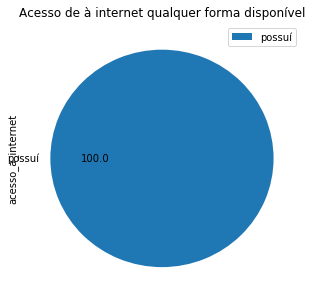

In [117]:
plot=acesso_geral.plot(kind='pie', title='Acesso de à internet qualquer forma disponível',legend=("possuí","não possuí"),autopct='%.1f',figsize=(5,5))


# 100% das pessoas possui acesso à internet de alguma forma.

In [118]:
#plot=acesso_domiciliar.plot(kind='pie', title='Acesso à internet no domicílio',legend=("possuí","não possuí"),autopct='%.1f',figsize=(5,5))

# 100% dos pesquisados possuem acesso à internet em seus domicílios.

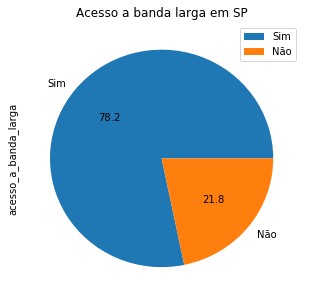

In [119]:
plot=banda_larga_SP.plot(kind='pie', title='Acesso a banda larga em SP',legend=("possuí","não possuí"),autopct='%.1f',figsize=(5,5))

#acesso a banda larga em SP

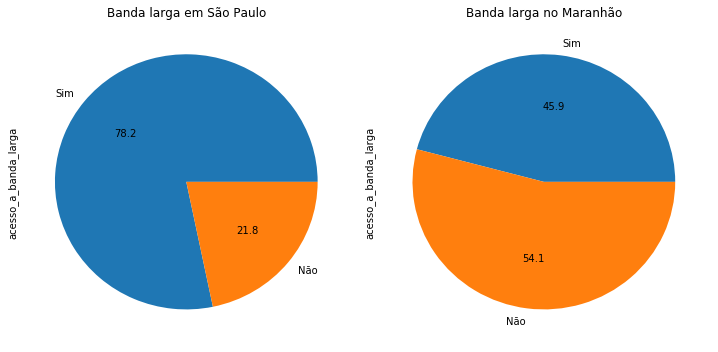

In [120]:
fig = plt.figure(figsize=(15,5))

plt.subplot(131)
plot = banda_larga_SP.plot(kind='pie',title='Banda larga em São Paulo',autopct='%.1f')

plt.subplot(132)
plot = banda_larga_MA.plot(kind='pie',title='Banda larga no Maranhão',autopct='%.1f')


plt.tight_layout()
plt.show()

## Obs:

    O gráfico acima ajuda a reforçar análises anteriores, em que o PIB de um estado ou região, a proporção entre casas e apartamentos da mesma afeta a presença de de banda larga.
Por exemplo: o estado de SP como o mais rico e mais urbanizado de todos, apresenta a maior presença de banda larga, ou seja se mostra como o estado mais bem estruturado e economicamente estável, enquanto Maranhão que é um estado com o menor PIB do Brasil e com baixa urbanização mostra baixíssima presença de banda larga. Note no entando que apesar de ser o estado com menor PIB não é o estado com menor urbanização demonstrando assim de forma muito explícita que fatores como renda da população podem afetar fortemente a presença de banda larga assim como o grau de urbanização. Desta forma pode-se aprofundar a análise, concluindo que a presença de banda larga é um fenômeno complexo, que não depende primariamente de apenas um fator, mas sim de vários fatores que podem ser vistos tanto como independentes como interligados; 
    Veja: uma região pode ter alto urbanização o que permite a venda de banda larga, porém se a renda per capita média for baixa, a população não irá adquirir banda larga. (note que o inverso também é verdadeiro, pode haver dinheiro mas não adianta se não houver estrurura).
    Note que geralmente estes dois fatores: PIB alto e urbanização estão ligados mas está relação
    

___
## Conclusão 

Descreva aqui suas conclusões!